In [1]:
import os
import torch
import numpy as np
from PIL import Image
import base64
import requests
# General packages
import pandas as pd

In [2]:
from IPython.display import Image as IImage

In [3]:
# pd.set_option('display.max_rows', None)

d_path = '/raid/AISSEL/htest/datasets/av_data/ftest'
#before
df_b = pd.read_pickle(f'{d_path}/df_av_test_before_tags.pk')



In [4]:
df_b

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics,tag,ofa_caption,gt
0,4,4,Firefighting Drones,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.512088,0.489315,a,"{'aircraft': 0, 'drone': 0, 'sensor': 0, 'uav'...",two men are standing in front of a drone,uav uavs unmanned uas
1,27,27,DJI mavic 2 pro in flight,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.506123,0.303162,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a small drone flying in the sky,drone uav uavs unmanned uas
2,51,51,A small UAS is seen flying during at the US Ar...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.456664,0.440849,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a drone flying in the sky,drone uav uavs unmanned uas
3,102,102,Ruko F11 GIM2 Drone with Camera for Adults 4K ...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.425304,0.273581,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a drone next to a speaker and aepercode5664�� U�,drone uav uavs unmanned uas
4,141,141,Police Drone Infographic,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.583138,0.356735,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a drone in a room with the words demon flypoli...,drone uav uavs unmanned uas
...,...,...,...,...,...,...,...,...,...,...,...,...
513,1792,1792,The various air traffic control facilities enc...,66,,iVBORw0KGgoAAAANSUhEUgAAASIAAAEhCAIAAABUSDpPAA...,0.488674,0.576398,j,"{'clearance': 1, 'aircraft': 1, 'airspace': 1,...",a diagram of an air traffic control system,clearance aircraft airspace airport flight radar
514,1795,1795,Its Our Passion Airspace Aviation,66,,iVBORw0KGgoAAAANSUhEUgAAAhcAAAGiCAYAAABUNuQTAA...,0.419291,0.538884,j,"{'clearance': 0, 'aircraft': 1, 'airspace': 1,...",an airplane is flying in the sky,aircraft airspace airport flight
515,1947,1947,Lufthansa Business Class on longhaul aircraft,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.333263,0.526307,j,"{'aircraft': 1, 'airline': 1, 'tower': 0, '911...",a person sleeping on an airplane seat,aircraft airline flight
516,1979,1979,911 Attacks Pentagon,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.655778,0.354867,j,"{'aircraft': 1, 'airline': 0, 'tower': 0, '911...",a painting of two people in an airplane,aircraft pentagon plane flight


In [5]:
def drop_nan(df):
#     print(df['gt'].isna().sum())
    df = df[df['gt'].notna()]
    df = df.reset_index(drop=True)
    return df

In [6]:
df_b = df_b.dropna()
df_b = df_b.reset_index(drop=True)
# tmp_df

In [7]:
print(len(df_b))


518


In [8]:
print(df_b.at[0, 'caption'])


Firefighting Drones


In [9]:
data_length = len(df_b)
data_length

518

In [10]:
d = [None] * data_length

In [11]:
def get_cap(idx):
    image_64_decode = base64.b64decode(df_b.at[idx,'image']) 
    image_result = open('test.jpg', 'wb')
    image_result.write(image_64_decode)
    wc = df_b.at[idx,'caption']
    gt = df_b.at[idx,'gt']
    return wc, gt

159


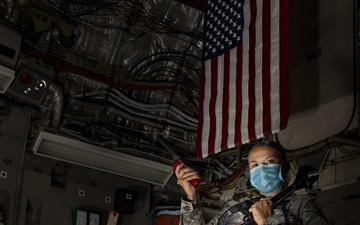

web caption: A cut above 911 AW Airman gives back
detected topics:  aircraft
160


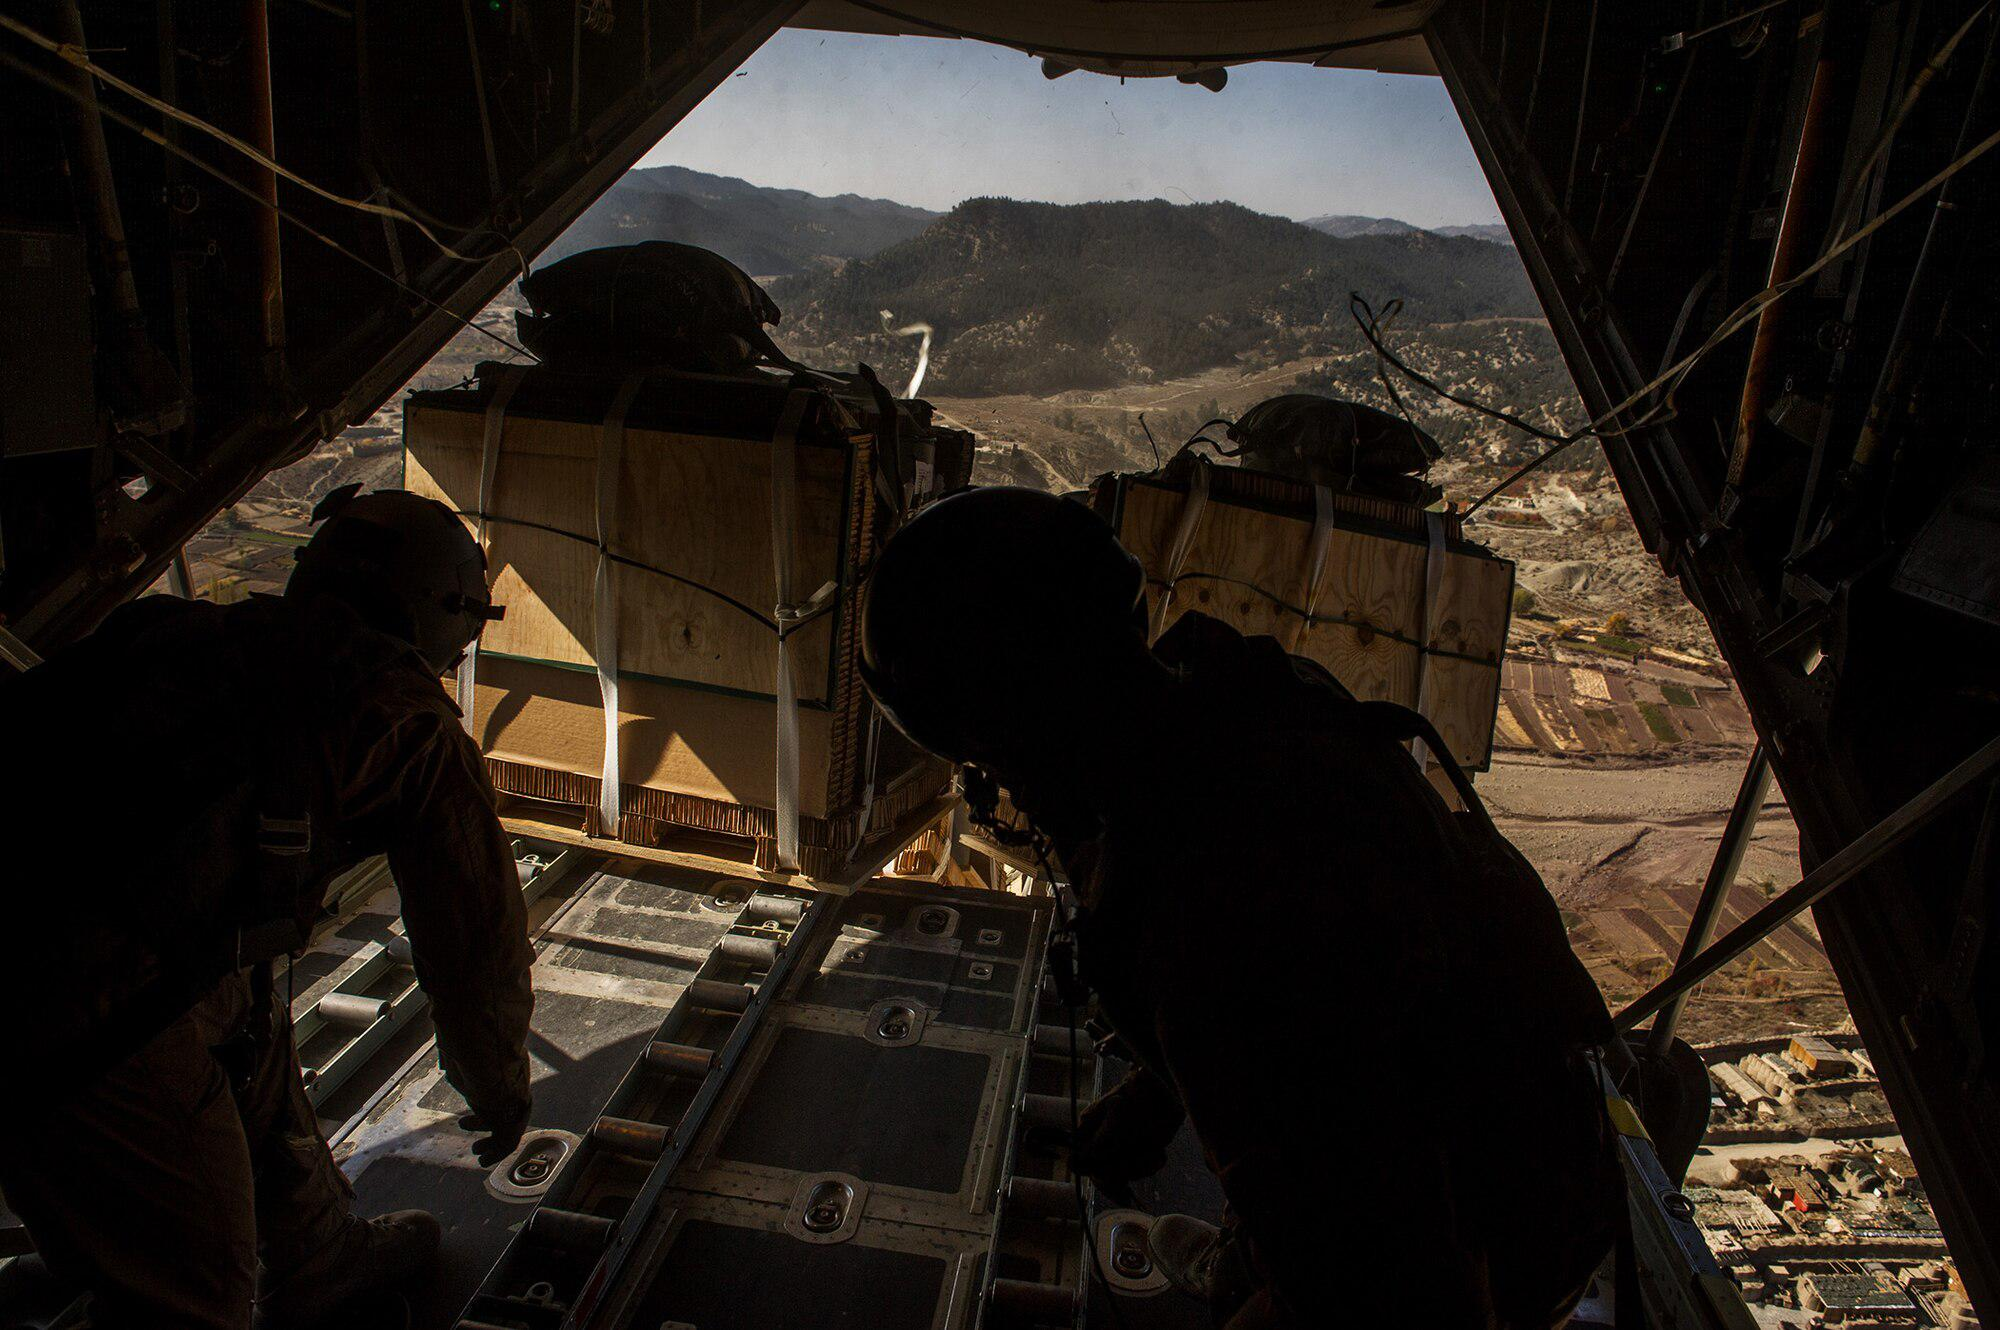

web caption: US Air Force Airman 1st Class Luke Tucciarone right and Staff Sgt Jacob Barnes left both 774th Expeditionary Airlift Squadron loadmasters push bundles of pallets out of a US Air Force C130H Hercules Oct 31 2012 over Afghanistan The 774th EAS provides tactical airlift airdrop and aeromedical evacuation creating an air bridge for personnel equipment and supplies Tucciarone hometown is Oxford Conn and Barnes hometown is Tionesta Pa US Air Force photoStaff Sgt Jonathan Snyder
detected topics:  fly airlift operational mission aircraft deployed


In [13]:
s_ind = 159
e_ind = 161
for idx, row in df_b.iterrows():
    if idx >=s_ind and idx < e_ind:
        print(idx)
        wc, gt = get_cap(idx)
        display(IImage(filename='test.jpg', width = 300, height = 200))
        print(f'web caption: {wc}')
        print(f'detected topics: {gt}') 

In [14]:
d[0] = "Two person operating a drone"
d[1] = "A drone flying in the air"
d[3] = "Drone with some of the parts"
d[4] = "Police drone advertisement"
d[5] = "A drone flying in the air"
d[6] = "A woman operating a drone"
d[7] = "A drone flying in the air"
d[8] = "Drone with some of the parts"
d[9] = "A drone flying in the air"
d[10] = "A drone"
d[11] = "A drone and a city view from top"
d[12] = "Drone with some of the parts"
d[13] = "An aircraft flying in the air"
d[14] = "An aircraft flying in the air"
d[15] = "A kid operating a toy aircraft"
d[16] = "A kid playing with a toy aircraft"
d[17] =  "An aircraft flying in the air"
d[18] = "An aircraft flying in the air"
d[19] = "Two aircrafts flying in the air"
d[20] = "An aircraft in wood"
d[21] = "An aircraft flying in the air"
d[22] = "Several landed aircrafts"
d[23] = "Two aircrafts flying in the air"
d[24] = "Two aircrafts flying in the air"
d[25] = "An aircraft flying in the air"
d[26] = "Two aircrafts flying in the air"
d[27] = "A landed aircraft"
d[28] = "A person falling down with a parachute"
d[29] = "A landed aircraft"
d[30] = "An aircraft"
d[31] = "Two aircrafts flying in the air"
d[32] = "An aircraft flying in the air"
d[33] = "An aircraft flying in the air"
d[34] = "An aircraft flying in the air"
d[35] = "An aircraft flying in the air"
d[36] = "An aircraft flying in the air"
d[37] = "An aircraft flying in the air"
d[38] = "A person falling down with a parachute"
d[39] = "A person falling down with a parachute"
d[40] = "A person falling down with a parachute"
d[41] = "An aircraft flying in the air"
d[42] = "A person falling down with a parachute"
d[43] = "A landed aircraft"
d[44] = "An aircraft flying in the air"
d[45] = "A person falling down with a parachute"
d[46] = "A part of an airplane flying in the air"
d[47] = "An aircraft flying in the air"
d[48] = "A person operating an aircraft"
d[49] = "An illustration of a person falling down with a parachute"
d[50] = "A landed aircraft"
d[51] = "Some aircrafts"
d[52] = "An aircraft flying in the air surrounded by clouds"
d[53] = "An aircraft flying in the air surrounded by clouds"
d[54] = "A person operating aircraft following another aircraft"
d[55] = "A partial view of an aircraft flying in the air with a passenger"
d[56] = "A sample aircraft"
d[57] = "A view from a flying aircraft"
d[58] = "A partial view of an aircraft flying in the air"
d[59] = "Curtiss-NC4 flying boat"
d[60] = "An aircraft flying in the air"
d[61] = "A floating aircraft"
d[62] = "An aircraft near water and a boat floating in the water"
d[63] = "A photograph of some aircrafts in water"
d[64] = "Some aircrafts"
d[65] = "An aircraft flying in the air surrounded by clouds"
d[66] = "A landed aircraft"
d[67] = "A aircraft flying over a sea with boat floating in the water"
d[68] = "Several aircrafts flying in the air"
d[69] = "People getting in an airplane"
d[70] = "An aerial view"
d[71] = "A landed aircraft"
d[72] = "Inside view of an aircraft"
d[73] = "A landed aircraft with some people around"
d[74] = "An aircraft"
d[75] = "An aircraft flying in the air surrounded by clouds"
d[76] = "Architecture of an aircraft"
d[77] = "Landed aircrafts"
d[78] = "Pros and cons chart of wing designs"
d[79] = "Two aircrafts flying in the air while some person waiting in the land"
d[80] = "An aircraft flying in the air"
d[81] = "An aircraft flying in the air"
d[82] = "An aircraft flying in the air"
d[83] = "Aircraft with some of the parts"
d[84] = "Aircraft with a remote"
d[85] = "Aircraft flying in the air"
d[86] = "Aircraft flying in the air"
d[87] = "Aircraft"
d[88] = "Landed aircraft"
d[89] = "Two images of landed aircraft"
d[90] = "Two images of aircrafts"
d[91] = "An aircraft flying in the air"
d[92] = "An aircraft taking off"
d[93] = "Part of aircraft"
d[94] = "Aircraft landing"
d[95] = "A landed aircraft"
d[96] = "Two images of aircraft"
d[97] ="Two images of aircraft"
d[98] = "Aircrafts flying in the air"
d[99] = "A landed aircraft"
d[100] = "An aircraft"
d[101] = "Two images of aircrafts"
d[102] = "An astronaut with aircraft"
d[103] = "Several aircrafts flying in the air"
d[104] = "A landed aircraft"
d[105] = "A landed aircraft"
d[106] = "A landed aircraft"
d[107] = "A landed helicopter inside"
d[108] = "Astronauts with spaceships and US flag"
d[109] = "Landed aircraft"
d[110] = "A person standing in front of an aircraft"
d[111] = "Aircraft"
d[112] = "An aircraft flying in the air"
d[113] = "An aircraft flying in the air"
d[114] = "Aircrafts"
d[115] = "An aircraft flying in the air"
d[116] = "A landed aircraft"
d[117] = "A landed aircraft"
d[118] = "Aircraft"
d[119] = "A landed aircraft"
d[120] = "A landed indoor aircraft"
d[121] = "A landed aircraft"
d[122] = "Several parts of aircraft"
d[123] = "Several parts of aircraft"
d[124] = "Aircraft flying in the air"
d[125] = "Junkers ju 287 aircraft"
d[126] = "Reichenberg missile"
d[127] = "Several parts of aircraft"
d[128] = "A landed aircraft"
d[129] = "Different types of aircrafts"
d[130] = "Several types of aircraft"
d[131] = "A landed aircraft"
d[132] = "A landed aircraft"
d[133] = "A landed aircraft"
d[134] = "Airplane offer advertisement"
d[135] = "A landed aircraft"
d[136] = "Flight journal subscription advertisement"
d[137] = "An aircraft model"
d[138] = "Aircraft"
d[139] = "An aircraft flying in the air"
d[140] = "An aircraft flying in the air"
d[141] = "US flag with some aircrafts"
d[142] = "A part of an aircraft"
d[143] = "146th Airlift Wing"
d[144] = "A person working indoor"
d[145] = "Air force training"
d[146] = "Air force officers"
d[147] = "Air force officers in front of an aircraft"
d[148] = "Cutting ribbon in an opening program"
d[149] = "An airforce officer and an aircraft"
d[150] = "Aircrafts flying in the air"
d[151] = "Aircrafts flying in the air"
d[152] = "FLying officer giving instruction in front of an aircraft"
d[153] = "People standing in front of US airforce plane"
d[154] = "Aircraft model"
d[155] = "A landed aircraft"
d[156] = "A part of a landed aircraft"
d[157] = "An open aircraft where people are working"
d[158] = "Officers entering an open aircraft"
d[159] = "Woman in front of US flag"
d[160] = "In a mission, flying aircraft are dumping cargo"
d[161] = "An aircraft flying in the air"
d[162] = "An aircraft flying in the air"
d[163] = "Aircrafts flying in the air"
d[164] = "Army officer"
d[165] = "Aircrafts with army"
d[166] = "Aircrafts with army"
d[167] = "Two woman standing"
d[168] = "A landed aircraft"
d[169] = "Australian airforce badge"
d[170] = "Aircrafts"
d[171] = "Aircrafts"
d[172] = "An aircraft with pilot"
d[173] = "An aircraft flying in the air"
d[174] = "A view of a aircraft from the sky"
d[175] = "An aircraft flying in the air"
d[176] = "A landed aircraft"
d[177] = "Landed destroyed aircraft"
d[178] = "An aircraft flying in the air"
d[179] = "An aircraft flying in the air"
d[180] = "An aircraft"
d[181] = "A landed aircraft"
d[182] = "An aircraft"
d[183] = "An aircraft"
d[184] = "Two aircrafts flying in the air"
d[185] = "Several types of aircrafts"
d[186] = "Part of aircrafts"
d[187] = "Chapter from an aircraft book"
d[188] = "A landed helicopter"
d[189] = "An aircraft"
d[190] = "A landed aircraft"
d[191] = "Illustration of an aircraft"
d[192] = "Landed aircraft indoor"
d[193] = "Several landed aircrafts"
d[194] = "Design of an aircraft"
d[195] = "An aircraft flying in the air"
d[196] = "A landed aircraft"
d[197] = "Illustration of aircrafts"
d[198] = "Design of an aircraft"
d[199] = "A landed aircraft"
d[200] = "An aircraft flying in the air"
d[201] = "Some landed aircrafts"
d[202] = "Some aircrafts flying in the air"
d[203] = "Delta airlines airplane flying in the air"
d[204] = "Airplanes in runway"
d[205] = "An aircraft flying in the air"
d[206] = "United and American Airlines airplanes flying in the air"
d[207] = "Southwest airline airplane landing in the runway"
d[208] = "Three aircrafts flying in the air"
d[209] = "One aircraft flying in the air"
d[210] = "An aircraft flying in the air"
d[211] = "An aircraft flying in the air"
d[212] = "An aircraft flying in the air"
d[213] = "A landed aircraft"
d[214] = "A part of a flying aircraft" 
d[215] = "An aircraft flying in the air"
d[216] = "A landed aircraft"
d[217] = "Some landed southwest airplanes"
d[218] = "Cockpit of an airplane"
d[219] = "An aircraft flying in the air"
d[220] = "An airplane taking off"
d[221] = "List of passengers in an airplane"
d[222] = "An aircraft flying in the air"
d[223] = "A landed aircraft of Lufthansa airlines"
d[224] = "Inside view of an airplane" 
d[225] = "A british airways plane flying in the air"
d[226] = "A tower and an aircraft flying in the air"
d[227] = "An aircraft flying close to ground"
d[228] = "The development of Jet and Turbines aero engines-A bookresentation by BIll Gunston"
d[229] = "Design for Mars airplane"
d[230] = "Wing design for supersonic transport manual"
d[231] = "Wing design for supersonic transport manual"
d[232] = "A part of an aircraft"
d[233] = "Cockpit of an aircraft"
d[234] = "A part of an aircraft"
d[235] = "An aircraft flying in the air"
d[236] = "US airforce landed aircraft"
d[237] = "Several landed aircrafts"
d[238] = "An aircraft"
d[239] = "Landed aircrafts"
d[240] = "2 aircraft models"
d[241] = "An aircraft flying in the air"
d[242] = "US airforce landed aircrafts"
d[243] = "Flight manual"
d[244] = "A landed aircraft"
d[245] = "A landed aircraft"
d[246] = "An aircraft flying in the air"
d[247] = "An aircraft flying in the air"
d[248] = "An Emirates aircraft flying in the air"
d[249] = "An Air France aircraft flying in the air"
d[250] = "An united airlines landed aircraft with airport employees"
d[251] = "A Lufthansa airlines landed aircraft"
d[252] = "An aircraft flying in the air"
d[253] = "A landed aircrafts and some cars"
d[254] = "Virgin Atlantic aircrafts landed"
d[255] = "Lufthansa aircrafts landed"
d[256] = "An aircraft flying in the air"
d[257] = "An aircraft flying in the air"
d[258] = "Inside view of an aircraft"
d[259] = "Inside view of an aircraft where a person taking a photograph"
d[260] = "A Southwest aircraft flying in the air"
d[261] = "A Southwest aircraft flying in the air"
d[262] = "Landed aircrafts"
d[263] = "Landed aircrafts"
d[264] = "A landed aircraft"
d[265] = "An aircraft flying in the air"
d[266] = "Aircraft model"
d[267] = "Landed aircrafts"
d[268] = "An aircraft flying in the air"
d[269] = "A Southwest aircraft flying in the air"
d[270] = "An aircraft flying in the air"
d[271] = "A landed aircraft"
d[272] = "Southwest airlines landed aircraft"
d[273] =  "A landed aircraft"
d[274] = "United airlines landed aircraft"
d[275] = "A landed aircraft"
d[276] =  "A landed aircraft"
d[277] =  "A landed aircraft"
d[278] = "An aircraft flying in the air"
d[279] = "Inside view of an aircraft with pilots"
d[280] = "An aircraft landing"
d[281] = "An aircraft flying in the air"
d[282] = "A landed aircrafts"
d[283] = "Landed airfcrafts"
d[284] = "Landed aircraft in airport"
d[285] = "Westjet aircraft"
d[286] = "Landed aircrafts"
d[287] =  "An aircraft flying in the air"
d[288] =  "A landed aircraft"
d[289] = "Landed aircrafts"
d[290] = "An aircraft flying in the air"
d[291] = "Westjet aircrafts"
d[292] = "Landed aircrafts"
d[293] = "Landed aircraft"
d[294] = "A view of aircrafts from boarding area"
d[295] = "A landed Westjet aircraft"
d[296] = "An aircraft flying in the air"
d[297] = "An aircraft flying in the air"
d[298] = "A landed Westjet aircraft"
d[299] = "An aircraft flying in the air"
d[300] = "An aircraft flying in the air"
d[301] = "An aircraft"
d[302] = "An aircraft taking off"
d[303] = "A landed aircraft"
d[304] = "Airlines advertisement"
d[305] = "A landed aircraft"
d[306] = "Landed aircrafts"
d[307] = "Landed aircrafts"
d[308] = "Fiji airways aircraft"
d[309] = "Qantas airways aircrafts landed"
d[310] = "A landed aircraft"
d[311] = "An aircraft in runway"
d[312] = "An aircraft flying over water"
d[313] =  "An aircraft flying in the air"
d[314] = "Landed aircrafts"
d[315] = "An aircraft landing"
d[316] = "Landed aircrafts"
d[317] = "An aircraft"
d[318] = "A landed aircraft"
d[319] = "Aircrafts in airport" 
d[320] = "An aircraft flying in the air"
d[321] = "An aircraft landing"
d[322] = "Imperial airways design"
d[323] = "An aircraft flying in the air"
d[324] = "A landed aircraft"
d[325] = "A landed aircraft"
d[326] = "An aircraft flying in the air"
d[327] = "A landed aircraft"
d[328] = "A landed aircraft"
d[329] = "An aircraft flying in the air"
d[330] = "An Emirates aircraft flying in the air"
d[331] = "An aircraft landing"
d[332] = "A landed Qantas aircraft"
d[333] = "Landed United aircrafts"
d[334] = "Aircraft taking off"
d[335] = "An aircraft and some equipments"
d[336] = "Several landed aircrafts"
d[337] = "Landed aircrafts in an airport"
d[338] = "Landed aircrafts in an airport"
d[339] = "Landed aircraft near water"
d[340] = "A landed United aircraft"
d[341] = "An aircraft landing"
d[342] = "Partially visible aircraft in runway"
d[343] = "Landed aircrafts"
d[344] = "Landed aircrafts"
d[345] = "Advertisement images of shutterstock.com"
d[346] = "A landed aircraft"
d[347] = "Landed aircrafts"
d[348] =  "Landed aircrafts"
d[349] =  "Landed aircrafts"
d[350] = "Passenger luggages"
d[351] = "Passenger luggages"
d[352] = "Airport sign"
d[353] = "A landed aircraft"
d[354] = "A landed aircraft"
d[355] = "A landed aircraft"
d[356] = "An aircraft flying in the air"
d[357] = "A landed aircraft"
d[358] = "A landed aircraft"
d[359] = "A landed aircraft"
d[360] = "A landed aircraft"
d[361] = "Landed aircrafts"
d[362] = "A landed aircraft"
d[363] = "Inside view of an aircraft with some airlines employees"
d[364] = "An aircraft flying in the air"
d[365] = "An aircraft flying in the air"
d[366] = "A landed aircraft"
d[367] = "An aircraft flying in the air"
d[368] = "An aircraft flying in the air"
d[369] = "An aircraft flying in the air"
d[370] = "An aircraft flying in the air"
d[371] = "A landed aircraft"
d[372] = "Inside view of an airplane"
d[373] = "Inside view of an airplane"
d[374] = "Inside view of an airplane"
d[375] = "Inside view of an airplane"
d[376] = "View of an airport"
d[377] = "A landed aircraft"
d[378] = "An aircraft flying in the air"
d[379] = "An aircraft flying in the air"
d[380] = "A view of an aircraft"
d[381] = "A landed aircraft"
d[382] = "A partially visible aircraft flying in the air"
d[383] = "A partially visible aircraft"
d[384] = "A view from an airport"
d[385] ="A view from an airport"
d[386] = "A landed aircraft"
d[387] = "An aircraft flying in the air"
d[388] = "Inside view of an aircraft"
d[389] = "Inside view of an aircraft"
d[390] = "Aircrafts landed in airport"
d[391] = "An aircraft flying in the air"
d[392] = "A landed aircraft"
d[393] = "A landed aircraft"
d[394] = "A landed aircraft"
d[395] = "An aircraft flying in the air"
d[396] = "An aircraft flying in the air"
d[397] = "A view of an airport"
d[398] = "A landed aircraft"
d[399] = "An aircraft flying in the air"
d[400] = "A landed aircraft"
d[401] = "A landed aircraft"
d[402] = "An aircraft flying in the air"
d[403] = "Air Asia symbol"
d[404] = "An aircraft flying in the air with trees behind"
d[405] = "A landed aircraft"
d[406] =  "An aircraft flying in the air"
d[407] = "A landed aircraft"
d[408] = "An aircraft flying in the air"
d[409] = "An aircraft flying in the air"
d[410] = "An aircraft"
d[411] = "A landed aircraft"
d[412] = "A landed aircraft"
d[413] = "A landed aircraft"
d[414] = "A cockpit" 
d[415] = "Two aircraft flying in the air"
d[416] = "An aircraft flying in the air"
d[417] = "An aircraft with a person outside"
d[418] = "An aircraft with people around"
d[419] = "A person operating an aircraft" 
d[420] = "A landed aircraft"
d[421] = "An aircraft flying in the air"
d[422] = "An aircraft flying in the air"
d[423] = "Aircrafts flying in the air"
d[424] = "Image of lightnigs to spitfires" 
d[425] = "A landed aircraft and an army person in front of it"
d[426] = "Landed aircraft indoor"
d[427] = "Fighter pilot"
d[428] = "Flying Naked"
d[429] = "A landed aircraft" 
d[430] = "Garmin Symbol"
d[431] = "An aircraft flying in the air"
d[432] = "Two flying aircrafts"
d[433] = "An aircraft flying in the air"
d[434] = "An aircraft and city view at nigth"
d[435] = "A landed aircraft"
d[436] = "A landed aircraft"
d[437] = "A dashboard of an aircraft"
d[438] = "An animated aircraft above a city"
d[439] = "A dashboard of an aircraft"
d[440] = "Cockpit of an aircraft"
d[441] = "Cockpit of an aircraft"
d[442] = "Cockpit of an aircraft"
d[443] = "Cockpit of an aircraft with pilot"
d[444] = "Cockpit of an aircraft with pilot"
d[445] = "Cockpit of an aircraft"
d[446] = "Cockpit of an aircraft"
d[447] = "Cockpit of an aircraft with pilots"
d[448] = "Cockpit of an aircraft"
d[449] = "Cockpit of an aircraft"
d[450] = "Cockpit of an aircraft"
d[451] = "Cockpit of an aircraft"
d[452] = "Cockpit of an aircraft"
d[453] = "Cockpit of an aircraft"
d[454] = "Cockpit of an aircraft"
d[455] = "Cockpit of an aircraft"
d[456] = "Cockpit of an aircraft"
d[457] = "Cockpit of an aircraft"
d[458] = "Cockpit of an aircraft with pilot"
d[459] = "Cockpit of an aircraft with pilot"
d[460] = "A view from a flying plane cockpit"
d[461] = "A cockpit of an aircraft"
d[462] = "A cockpit of an aircraft"
d[463] = "A cockpit of an aircraft"
d[464] = "A cockpit of an aircraft"
d[465] = "A cockpit of an aircraft"
d[466] = "An aircraft under water"
d[467] = "A view from a flying plane cockpit"
d[468] = "A cockpit of an aircraft"
d[469] = "A cockpit of an aircraft"
d[470] = "A cockpit of an aircraft"
d[471] = "Outside view from an aircraft through small holes"
d[472] = "A cockpit of an aircraft"
d[473] = "A cockpit of an aircraft"
d[474] = "A grounded aircraft after accident"
d[475] =  "A grounded aircraft after accident"
d[476] = "A cockpit of an aircraft"
d[477] = "A grounded aircraft after accident which caught fire"
d[478] = "Flight recorder"
d[479] = "A pilot in a cockpit"
d[480] = "A grounded turkish airlines aircraft after accident"
d[481] = "A cockpit of an aircraft"
d[482] = "A pilot operating an aircraft"
d[483] = "A cockpit of an aircraft"
d[484] = "A pilot inside an aircraft"
d[485] = "A cockpit of an aircraft"
d[486] = "A cockpit of an aircraft"
d[487] = "A cockpit of an aircraft"
d[488] = "An aircraft with pilots"
d[489] = "A cockpit of an aircraft"
d[490] = "The pilit approaching an aircraft"
d[491] = "A woman standing"
d[492] = "A crowd around an aircraft"
d[493] = "A person sitting in top of an aircraft"
d[494] = "A person approaching an aircraft"
d[495] = "A partial view of an aircraft"
d[496] = "A person in front of an aircraft"
d[497] = "A person in front of an aircraft"
d[498] = "Two person in front of an aircraft"
d[499] = "A woman in the driving seat in an aircraft"
d[500] = "A person in the drivign seat of an aircraft"
d[501] = "Two aircrafts flying close to the ground"
d[502] = "A woman sitting in top of an aircraft"
d[503] = "An animated woman"
d[504] = "An aircraft taking off from runway"
d[505] = "The breakthrough treatement for fear of flying book"
d[506] = "Women inside an aircraft holding her head due to anxiety or headache"
d[507] = "Two aircrafts flying in the air"
d[508] = "Fear of flying book"
d[509] = "A tail of an aircraft"
d[510] = "A frustrated passenger in an aircraft"
d[511] = "A passenger screaming inside an aircraft"
d[512] = "A scared passenger in an aircraft"
d[513] = "Air traffic control system design"
d[514] = "An aircraft flying in the air"
d[515] = "Passengers inside an airplane" 
d[516] = "A pilot in the driving seat of an aircraft"
d[517] = "Fragments of flight 93 in a museum"

In [15]:
df_b['h_caption'] = d

In [16]:
df_b = df_b.dropna()
df_b = df_b.reset_index(drop=True)
print(len(df_b))

517


In [17]:
df_b

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics,tag,ofa_caption,gt,h_caption
0,4,4,Firefighting Drones,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.512088,0.489315,a,"{'aircraft': 0, 'drone': 0, 'sensor': 0, 'uav'...",two men are standing in front of a drone,uav uavs unmanned uas,Two person operating a drone
1,27,27,DJI mavic 2 pro in flight,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.506123,0.303162,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a small drone flying in the sky,drone uav uavs unmanned uas,A drone flying in the air
2,102,102,Ruko F11 GIM2 Drone with Camera for Adults 4K ...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.425304,0.273581,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a drone next to a speaker and aepercode5664�� U�,drone uav uavs unmanned uas,Drone with some of the parts
3,141,141,Police Drone Infographic,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.583138,0.356735,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a drone in a room with the words demon flypoli...,drone uav uavs unmanned uas,Police drone advertisement
4,156,156,Teal drones swarm,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.503839,0.290723,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'...",a military helicopter flying in the desert,drone uav uavs unmanned uas,A drone flying in the air
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1792,1792,The various air traffic control facilities enc...,66,,iVBORw0KGgoAAAANSUhEUgAAASIAAAEhCAIAAABUSDpPAA...,0.488674,0.576398,j,"{'clearance': 1, 'aircraft': 1, 'airspace': 1,...",a diagram of an air traffic control system,clearance aircraft airspace airport flight radar,Air traffic control system design
513,1795,1795,Its Our Passion Airspace Aviation,66,,iVBORw0KGgoAAAANSUhEUgAAAhcAAAGiCAYAAABUNuQTAA...,0.419291,0.538884,j,"{'clearance': 0, 'aircraft': 1, 'airspace': 1,...",an airplane is flying in the sky,aircraft airspace airport flight,An aircraft flying in the air
514,1947,1947,Lufthansa Business Class on longhaul aircraft,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.333263,0.526307,j,"{'aircraft': 1, 'airline': 1, 'tower': 0, '911...",a person sleeping on an airplane seat,aircraft airline flight,Passengers inside an airplane
515,1979,1979,911 Attacks Pentagon,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.655778,0.354867,j,"{'aircraft': 1, 'airline': 0, 'tower': 0, '911...",a painting of two people in an airplane,aircraft pentagon plane flight,A pilot in the driving seat of an aircraft


In [18]:
df_b.to_pickle(f'av_base.pk')